In [199]:
import pandas as pd
import numpy as np
from tqdm import tqdm_notebook
import difflib
import sys
import re
from matplotlib import pyplot as plt
import matplotlib

from sklearn.ensemble import GradientBoostingClassifier

import scipy
from scipy import spatial

In [ ]:
# Check 7 общих статей-вопросов

In [200]:
train, test = pd.read_csv("train_task1_latest.csv"), pd.read_csv("test_task1_latest.csv")

In [201]:
train.paragraph[0]

'В отличие от рыб, земноводные (амфибии) и пресмыкающиеся (рептилии или гады) уже имеют два круга кровообращения и сердце у них трёхкамерное (появляется межпредсердная перегородка). Единственные современные рептилии, имеющие хотя и неполноценное (межпредсердиевая перегородка не полностью разделяет предсердия, что скорей всего связано с переходом предков к полуводному образу жизни и снижению активности), но уже четырёхкамерное сердце — крокодилы. Считается, что впервые четырёхкамерное сердце появилось у примитивных архозавров и развитых синапсидов. В дальнейшем такое строение сердца унаследовали прямые потомки динозавров — птицы и потомки примитивных млекопитающих — современные млекопитающие.'

In [202]:
train.question[0]

'С какого года Русское Царство перешло на летоисчисление от Рождества Христова и празднование Нового года 1 января, а не 1 сентября?'

In [313]:
import string
def is_uppercase(word):
    print(word[0])
    if word[0] in list('АБВГДЕЁЖЗИЙКЛМНОПРСТУФХЦЧШЩЪЫБЭЮЯ'):
        return True
    else:
        return False

In [314]:
print(string.ascii_uppercase)

ABCDEFGHIJKLMNOPQRSTUVWXYZ


In [317]:
is_uppercase('Просто текст')

П


True

In [484]:
# df - train dataset;
# variable = переменная
# variable_title - название переменной на графике
def PlotHistByTarget(variable, variable_title, min_x, max_x, df): 
    print('Histogram for '+variable_title)
    
    print(DescStatsByTarget(variable, variable_title, df))
    
    plt.style.use('seaborn-deep')
    hist_df = pd.DataFrame({'target':df['target'],variable_title:variable})
    pyplot.hist([hist_df[hist_df['target']==0][variable_title].values,hist_df[hist_df['target']==1][variable_title].values], 
                bins = 100, 
                alpha = 0.5, 
                label=['target: 0','target: 1'], 
                color = ['r','b'])
    plt.xlim(xmin=min_x, xmax = max_x)
    plt.legend()
    plt.show()
    
def DescStatsByTarget(variable, variable_title, df):
    dft = pd.DataFrame({'target':df['target'],variable_title:variable})
    
    x = dft[dft['target']==0][variable_title].values
    dfx = pd.DataFrame({'target: 0':x})
    
    count0 = len(x)
    mean0 = round(np.mean(x),6)
    std0 = round(np.std(x),6)
    min0 = round(np.min(x),6)
    median0 = round(np.median(x),6)
    max0 = round(np.max(x),6)
    
    y = dft[dft['target']==1][variable_title].values
    dfy = pd.DataFrame({'target: 1':y})
    
    count1 = len(y)
    mean1 = round(np.mean(y),6)
    std1 = round(np.std(y),6)
    min1 = round(np.min(y),6)
    median1 = round(np.median(y),6)
    max1 = round(np.max(y),6)
    
    df_desc = pd.DataFrame([[count0, mean0, std0, min0, median0, max0],
                        [count1, mean1, std1, min1, median1, max1]],
                        columns = ['count','mean','std','min','median','max'], 
                        index=[variable_title+' (target: 0)',variable_title+' (target: 1)'])
    
    return df_desc

In [203]:
def uniq_words(text):
    return set(re.findall("\w+", text))

In [204]:
for name, df in [('train', train), ('test', test)]:
    df.set_value(0,'list_ratio',0)
    df.set_value(0,'list_intersections',0)
    df['list_ratio'] = df['list_ratio'].astype(object)
    df['list_intersections'] = df['list_intersections'].astype(object)
    for index, row in tqdm.tqdm_notebook(df.iterrows(), total=df.shape[0], desc="build features for " + name):
        sentences = row.paragraph.split('. ')
        question = row.question
        
        unq_question = uniq_words(row.question)
        
        list_ratio = []
        list_intersections = []
        
        for sentence in sentences:
            list_ratio.append(round(difflib.SequenceMatcher(None,sentence, question).ratio(),5))
            list_intersections.append(len(uniq_words(sentence) & unq_question))
        
        df.set_value(index, 'list_ratio', list_ratio)
        df.set_value(index, 'list_intersections', list_intersections)
        df.loc[index, 'len_paragraph'] = len(uniq_words(row.paragraph))
        df.loc[index, 'len_question'] = len(unq_question)
        df.loc[index, 'len_intersection'] = len(uniq_words(row.paragraph) & unq_question)

In [319]:
train.to_csv("train_feat.csv", index=False)
test.to_csv("test_feat.csv", index=False)

trainf, testf = pd.read_csv("train_feat.csv", encoding ='ISO-8859-1'), pd.read_csv("test_feat.csv", encoding ='ISO-8859-1')

Histogram for len_question
                          count       mean       std  min  median   max
len_question (target: 0)  85361  15.052214  6.360197  4.0    14.0  64.0
len_question (target: 1)  34037   8.577842  3.949244  2.0     8.0  60.0


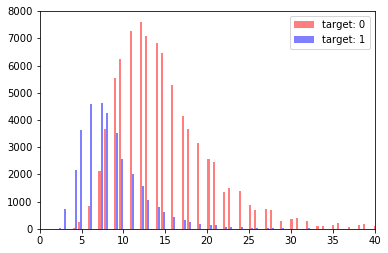

In [485]:
PlotHistByTarget(trainf.len_question, 'len_question', 0, 40, trainf)

In [208]:
trainf.head()

,paragraph_id,question_id,paragraph,question,target,list_ratio,list_intersections,len_paragraph,len_question,len_intersection
0,1094,46273,"Â îòëè÷èå îò ðûá, çåìíîâîäíûå (àìôèáèè) è ïðåñ...",Ñ êàêîãî ãîäà Ðóññêîå Öàðñòâî ïåðåøëî íà ëåòîè...,0.0,"[0.24516, 0.11587, 0.14592, 0.31769]","[2, 2, 1, 1]",67.0,19.0,3.0
1,7414,19164,Â 1049 ãîäó Áàëäóèíó V óäàëîñü îòíÿòü ó Ãåðìàí...,Êòî óïîìÿíóë î åãî ïåðâûõ ðàçíîãëàñèÿõ ñî Øòåé...,0.0,"[0.02841, 0.0479, 0.03165, 0.05714, 0.02, 0.02...","[0, 2, 0, 0, 0, 2, 0]",89.0,31.0,3.0
2,6744,39767,Ñòðåìëåíèå äîñòè÷ü ïðåäåëüíûõ çíà÷åíèé ¸ìêîñòè...,Êàê íàçûâàåòñÿ èìåþùàÿ ìèðîâîå çíà÷åíèå ýïîõà ...,0.0,"[0.25189, 0.18962]","[2, 3]",62.0,20.0,3.0
3,7300,36318,Ïåðâûé ïðàêòè÷åñêè ïðèãîäíûé äâóõòàêòíûé ãàçîâ...,×òî óñóãóáëÿëîñü èç-çà ìåæäóíàðîäíîãî äàâëåíèÿ...,0.0,"[0.14286, 0.21739, 0.01905, 0.25085, 0.23313, ...","[0, 0, 1, 3, 0, 0, 1, 0]",66.0,14.0,3.0
4,7077,41534,Òðåáóÿ îò õóäîæíèêà óãëóáëåííîãî èçó÷åíèÿ èçîá...,Êàêîé õàðàêòåð íîñÿò ïðîðî÷åñòâà Ëåîíàðäî äà Â...,0.0,"[0.29907, 0.26573, 0.16514, 0.31429, 0.16304]","[3, 0, 0, 0, 0]",93.0,7.0,3.0


In [324]:
for name, df in [('train', trainf), ('test', testf)]:
    for index, row in tqdm.tqdm_notebook(df.iterrows(), total=df.shape[0], desc="build features for " + name):
        df.loc[index, 'min_ratio'] = np.min(ast.literal_eval(row.list_ratio))
        df.loc[index, 'max_ratio'] = np.max(ast.literal_eval(row.list_ratio))
        df.loc[index, 'std_ratio'] = np.std(ast.literal_eval(row.list_ratio))
        df.loc[index, 'mean_ratio'] = np.mean(ast.literal_eval(row.list_ratio))
        df.loc[index, 'num_sentences'] = len(ast.literal_eval(row.list_ratio))
        df.loc[index, 'min_inter'] = np.min(ast.literal_eval(row.list_intersections))
        df.loc[index, 'max_inter'] = np.max(ast.literal_eval(row.list_intersections))

In [503]:
trainf.to_csv("train_feat2.csv", index=False)
testf.to_csv("test_feat2.csv", index=False)



In [504]:
trainf, testf = pd.read_csv("train_feat2.csv", encoding ='ISO-8859-1'), pd.read_csv("test_feat2.csv", encoding ='ISO-8859-1')

Histogram for min_ratio
                       count      mean       std  min   median      max
min_ratio (target: 0)  85361  0.110002  0.063889  0.0  0.12017  0.35345
min_ratio (target: 1)  34037  0.131520  0.068175  0.0  0.13506  0.97398


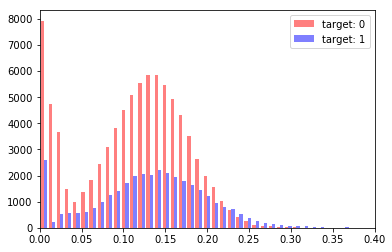

In [486]:
var_title = 'min_ratio' 
PlotHistByTarget(trainf.min_ratio, var_title, 0, 0.4, trainf)

Histogram for max_ratio
                       count      mean       std      min  median      max
max_ratio (target: 0)  85361  0.269191  0.076324  0.00510  0.2766  0.83333
max_ratio (target: 1)  34037  0.429532  0.180929  0.02071  0.3871  0.99145


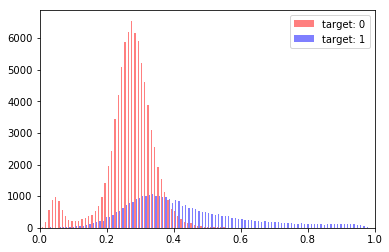

In [487]:
var_title = 'max_ratio' 
PlotHistByTarget(trainf.max_ratio, var_title, 0, 1, trainf)

Histogram for std_ratio
                       count      mean       std  min    median       max
std_ratio (target: 0)  85361  0.055267  0.026044  0.0  0.053419  0.252462
std_ratio (target: 1)  34037  0.103941  0.063265  0.0  0.090241  0.450137


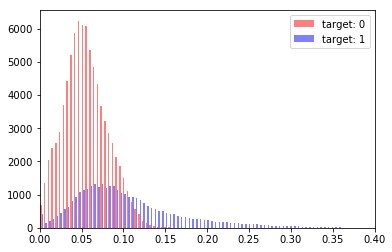

In [488]:
var_title = 'std_ratio' 
PlotHistByTarget(trainf.std_ratio, var_title, 0, 0.4, trainf)

Histogram for mean_ratio
                        count      mean       std      min    median       max
mean_ratio (target: 0)  85361  0.191673  0.054721  0.00255  0.199163  0.429312
mean_ratio (target: 1)  34037  0.249552  0.069220  0.02071  0.245534  0.973980


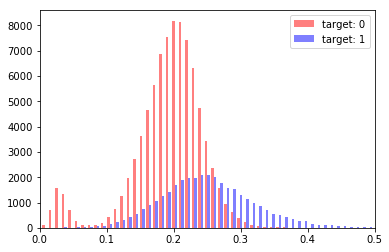

------------------------------------------------------------


In [493]:
var_title = 'mean_ratio' 
PlotHistByTarget(trainf.mean_ratio, var_title, 0, 0.5, trainf)
#PlotHistByTarget(testf.mean_ratio, var_title, testf)
print('-'*60)

Histogram for num_sentences
                           count      mean       std  min  median   max
num_sentences (target: 0)  85361  5.978608  2.415787  1.0     5.0  40.0
num_sentences (target: 1)  34037  5.745101  2.993409  1.0     5.0  73.0


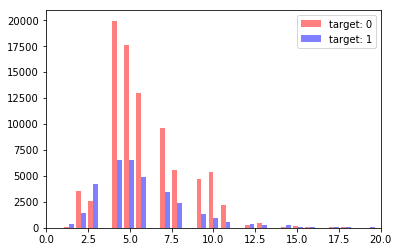

------------------------------------------------------------


In [518]:
var_title = 'num_sentences' 
PlotHistByTarget(trainf.num_sentences, var_title, 0, 20, trainf)
#PlotHistByTarget(testf.num_sentences, var_title, testf)
print('-'*60)

Histogram for min_inter
                       count      mean       std  min  median   max
min_inter (target: 0)  85361  0.226977  0.499684  0.0     0.0   7.0
min_inter (target: 1)  34037  0.253959  0.934635  0.0     0.0  53.0


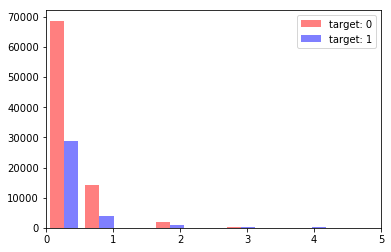

------------------------------------------------------------


In [497]:
var_title = 'min_inter' 
PlotHistByTarget(trainf.min_inter, var_title, 0, 5, trainf)
#PlotHistByTarget(testf.min_inter, var_title, testf)
print('-'*60)

Histogram for max_inter
                       count      mean       std  min  median   max
max_inter (target: 0)  85361  2.449163  0.767937  1.0     2.0  12.0
max_inter (target: 1)  34037  5.170256  3.970357  0.0     4.0  58.0


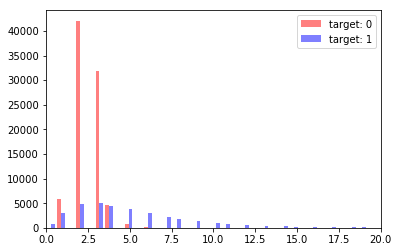

------------------------------------------------------------


In [501]:
var_title = 'max_inter' 
PlotHistByTarget(trainf.max_inter, var_title, 0, 20, trainf)
#PlotHistByTarget(testf.max_inter, var_title, testf)
print('-'*60)

# Models

In [210]:
columns = ['len_paragraph',
           'len_question',
           'len_intersection',
           'min_ratio',
           'max_ratio',
           'std_ratio',
           'mean_ratio',
           'num_sentences',
           'min_inter',
           'max_inter'
          ]

## Gradient Boosting

In [277]:
model = GradientBoostingClassifier().fit(trainf[columns], trainf['target'])

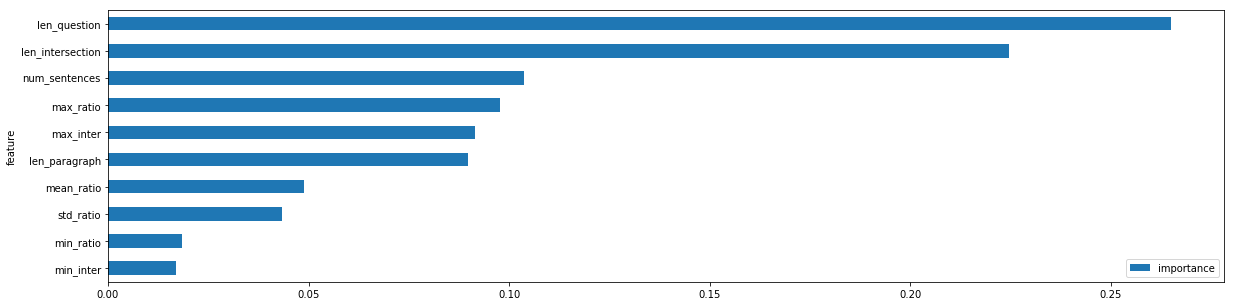

In [278]:
feat_importance(model, columns)

In [211]:
testf['prediction'] = model.predict(testf[columns])

In [212]:
testf.head()

,paragraph_id,question_id,paragraph,question,list_ratio,list_intersections,len_paragraph,len_question,len_intersection,min_ratio,max_ratio,std_ratio,mean_ratio,num_sentences,min_inter,max_inter,prediction
0,1361,6463,"Ïåðåäíèé ìîçã ñèëüíî ðàçâèò, ýòî ñàìàÿ áîëüøàÿ...",Â êàêîé ìèôîëîãèè äâà âîðîíà Õóãèí è Ìóíèí øåï...,"[0.25, 0.17964, 0.16162, 0.02597, 0.1641, 0.13...","[0, 0, 2, 0, 1, 0, 1, 3, 0, 0, 0, 0, 0, 0]",113.0,14.0,3.0,0.00000,0.29834,0.090838,0.153921,14.0,0.0,3.0,0.0
1,1403,34696,Ìèðìåêîëîãè èññëåäóþò ìóðàâü¸â êàê â ëàáîðàòîð...,Êîãäà èíñàéäåð ïîêóïàåò èëè ãèïîòåçû ÷åãî ýâîë...,"[0.18265, 0.24409, 0.33696, 0.23077, 0.21017, ...","[0, 0, 5, 0, 0, 0]",79.0,11.0,5.0,0.18265,0.33696,0.048354,0.237508,6.0,0.0,5.0,1.0
2,1435,13751,Âîëíîâàÿ: ñâåò ïðåäñòàâëÿåò ñîáîé âîëíó â íåâè...,"Êàêèå ïðåäïîëîæåíèÿ, ïî ìíåíèþ Íüþòîíà, äîïóñò...","[0.23077, 0.17634, 0.33113]","[1, 3, 1]",63.0,12.0,3.0,0.17634,0.33113,0.064113,0.246080,3.0,1.0,3.0,0.0
3,341,38544,Æèâûå îðãàíèçìû ïîä÷èíÿþòñÿ íà÷àëàì òåðìîäèíàì...,Â êàêèõ óñëîâèÿõ ìåòàáîëèçì ïîääåðæèâàåò ïîðÿä...,"[0.32558, 0.29412, 0.17391, 0.27673, 0.33333, ...","[0, 0, 0, 1, 1, 9]",89.0,10.0,9.0,0.17391,0.89820,0.235975,0.383645,6.0,0.0,9.0,1.0
4,1317,14589,Ôàéëû íåëàòèíñêîãî òåêñòà â Þíèêîäå âñåãäà çàí...,Êàêèì ìåëîäèÿì Ïðîêîôüåâà îñîáåííî íå óêëàäûâà...,"[0.02812, 0.02824, 0.00893]","[8, 4, 4]",86.0,24.0,11.0,0.00893,0.02824,0.009075,0.021763,3.0,4.0,8.0,0.0


## Logistic Regression (unbalanced classes)

In [511]:
model_name = 'LogReg'

In [512]:
from sklearn.linear_model import LogisticRegression

balance_weight = 1.900976181179227
lr = LogisticRegression(class_weight={0: 1, 1: balance_weight})

lr.fit(trainf[columns],trainf['target'])
testf['prediction'] = lr.predict(testf[columns])

In [513]:
print(testf[testf['prediction'] == 0].shape[0]/testf[testf['prediction'] == 1].shape[0])
balance_weight = testf[testf['prediction'] == 0].shape[0]/testf[testf['prediction'] == 1].shape[0]

1.5706376941974327


In [515]:
testf[testf.max_inter > 15.0]['prediction'].value_counts()

1.0    33
0.0    13
Name: prediction, dtype: int64

In [520]:
testf[testf.min_inter > 10.0]['prediction'].value_counts()

1.0    33
0.0    13
Name: prediction, dtype: int64

In [519]:
testf[testf.mean_ratio < 0.02]['prediction'].value_counts()

0.0    396
1.0    195
Name: prediction, dtype: int64

In [272]:
submit(testf['prediction'],model_name)

# Feature Importance

In [274]:
def feat_importance(model, columns):
    features = pd.DataFrame()
    features['feature'] = columns
    features['importance'] = model.feature_importances_
    features.sort_values(by=['importance'], ascending=True, inplace=True)
    features.set_index('feature', inplace=True)
    
    features.plot(kind='barh', figsize=(20, 5))
    plt.show()

# Submit

In [502]:
result_check = pd.read_csv('PD_LogReg.csv')
result_check.head()

,paragraph_id,question_id,prediction
0,1361,6463,1.0
1,1403,34696,0.0
2,1435,13751,1.0
3,341,38544,0.0
4,1317,14589,1.0


In [271]:
def submit(preds,model_name):
    res_frame = pd.DataFrame({"paragraph_id": testf.paragraph_id,
              "question_id": testf.question_id,
              "prediction": list(map(lambda x: 1.0 if x==0.0 else 0.0, list(preds.values)))})
    res_frame[['paragraph_id','question_id','prediction']].to_csv("PD_"+model_name+".csv", index=False)